# Resume Classification using TF-IDF

This is a demo of using TF-IDF for textual data classification.

Author: Jiayao Li

Email: jiayaoli333@gmail.com

## 0. Preparation

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import randrange

import nltk
from nltk.corpus import stopwords

In [12]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Data Exploration and Visualization

In [13]:
#Download dataset from Kaggle using the link below
#https://www.kaggle.com/datasets/jillanisofttech/updated-resume-dataset

df = pd.read_csv('/content/UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [14]:
categories = list(df['Category'].unique())
print(f'There are a total of {len(categories)} categories.')

There are a total of 25 categories.


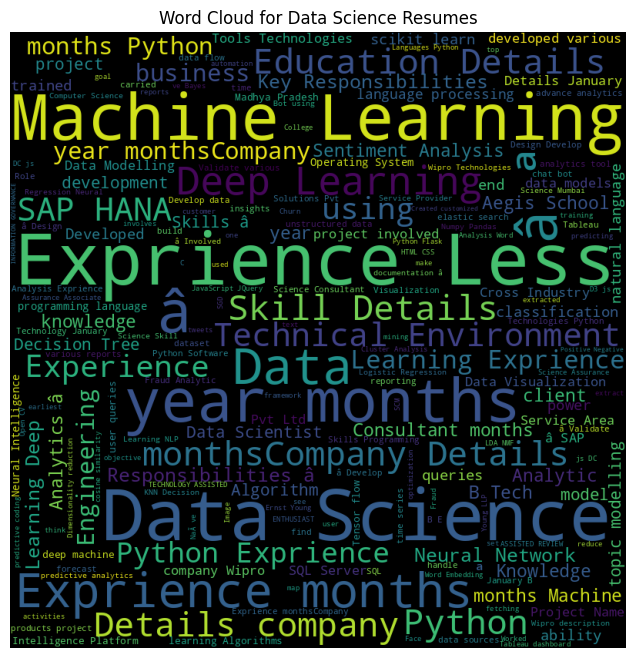

In [15]:
from wordcloud import WordCloud

seed = randrange(len(categories))
random_category = df['Category'][seed]

category_text = ' '.join(df[df['Category'] == random_category]['Resume'])
wordcloud = WordCloud(width=800, height=800, background_color='black').generate(category_text)

plt.figure(figsize=(8, 8))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(f'Word Cloud for {random_category} Resumes')
plt.show()

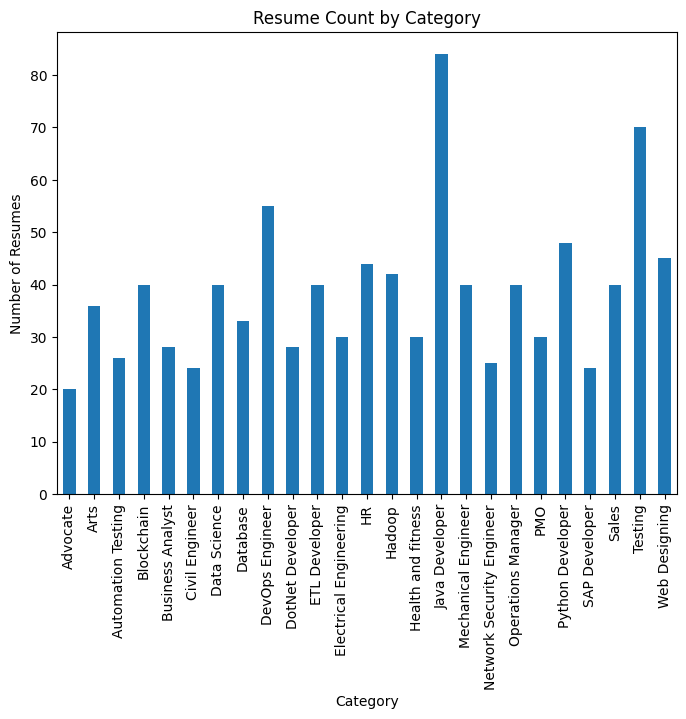

In [16]:
fig = plt.figure(figsize=(8,6))
df.groupby('Category').Resume.count().plot.bar(ylim=0)
plt.title("Resume Count by Category")
plt.xlabel("Category")
plt.ylabel("Number of Resumes")
plt.show()

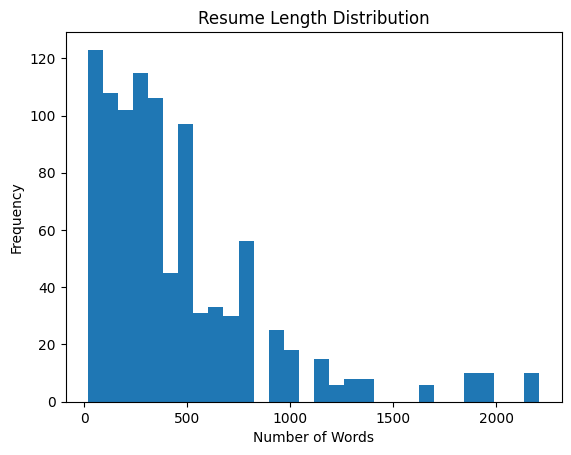

In [17]:
text_lengths = df['Resume'].apply(lambda x: len(x.split()))
plt.hist(text_lengths, bins=30)
plt.title('Resume Length Distribution')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

## 2. Data Preprocessing

### Text Cleansing

In [18]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [19]:
import re
import string

def clean_text(text):
    '''
    Perform stop-words removal and lemmatization
    '''
    text = text.lower()
    text = re.sub(r"[^a-zA-Z?.!,¿]+|http\S+", " ", text)
    text = ''.join([char for char in text if char not in string.punctuation])
    words = [word for word in text.split() if word not in stopwords.words('english')]
    words = [WordNetLemmatizer().lemmatize(word) for word in words]
    return " ".join(words)

In [20]:
df['Resume'] = df['Resume'].apply(clean_text)

In [21]:
df.head()

,Category,Resume
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail may may uit rgpv data scienti...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...


## 3. Feature Extraction using TF-IDF Vectorizer

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(min_df=5, ngram_range=(1, 2))

## 4. Classification

### Train-test split

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['Resume'], df['Category'], random_state=42)
X_train_vectorized = tfidf_vectorizer.fit_transform(X_train)

### Multinomial Naive Bayes as classifier

In [24]:
from sklearn.naive_bayes import MultinomialNB

mnb_classifier = MultinomialNB().fit(X_train_vectorized, y_train)

In [25]:
from sklearn.metrics import accuracy_score

y_test_predict_mnb = mnb_classifier.predict(tfidf_vectorizer.transform(X_test))
print('Accuracy:', accuracy_score(y_test, y_test_predict_mnb))

Accuracy: 0.9626556016597511


### Random Forest as classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier().fit(X_train_vectorized, y_train)

In [27]:
y_test_predict_rf = rf_classifier.predict(tfidf_vectorizer.transform(X_test))
print('Random Forest Accuracy:', accuracy_score(y_test, y_test_predict_rf))

Random Forest Accuracy: 0.9875518672199171


## 5. Example Predictions

In [28]:
#Multinomial Naive Bayes
resume_example_0 = ['I am skilled in python, machine learning, data mining, data structure and statistics.']
print(mnb_classifier.predict(tfidf_vectorizer.transform(resume_example_0)))

['Data Science']


In [29]:
#Random Forest
resume_example_1 = ['I have 3 years of experience in trading bitcoin, ethereum, and I am a big fan of nft.']
print(rf_classifier.predict(tfidf_vectorizer.transform(resume_example_1)))

['Advocate']


In [30]:
seed = randrange(len(df))

resume_example_2 = [df['Resume'][seed]]
test2_result = rf_classifier.predict(tfidf_vectorizer.transform(resume_example_2))[0]
print('Expected:', df['Category'][seed])
print('Prediction:', test2_result)

Expected: Network Security Engineer
Prediction: Network Security Engineer


## 6. Analysis

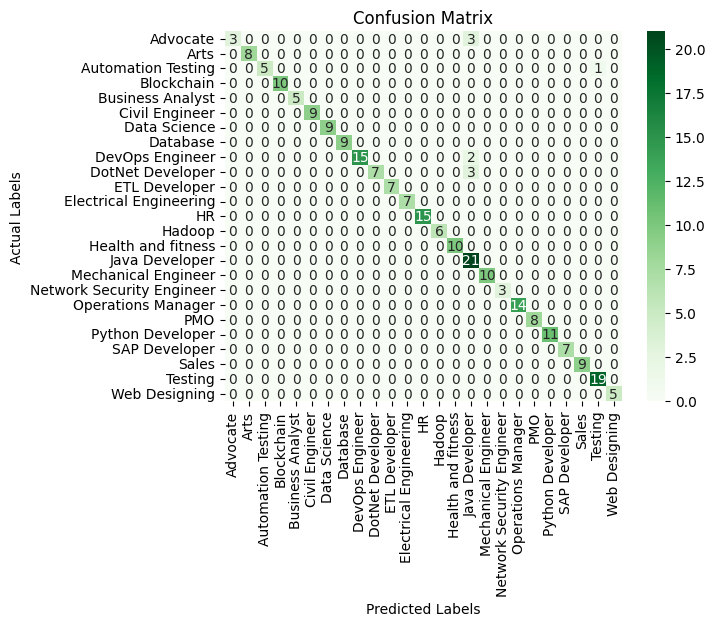

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_metrics = confusion_matrix(y_test, y_test_predict_mnb)

class_names = np.unique(np.concatenate((y_test, y_test_predict_mnb)))  # Change if you have specific class names
sns.heatmap(confusion_metrics, annot=True, fmt='d', cmap='Greens', xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

As shown above, using TF-IDF to extract features in resume classication leads to a satisfactory accuracy.

## Acknowledgments

Dataset: https://www.kaggle.com/datasets/jillanisofttech/updated-resume-dataset